In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns 


In [3]:
!pip install yfinance

In [4]:
from sklearn.datasets import make_blobs
import yfinance as yf

[*********************100%***********************]  1 of 1 completed


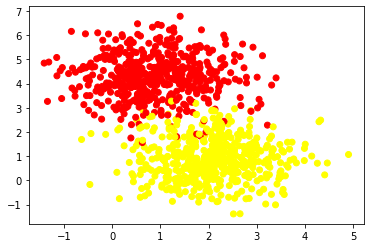

In [5]:

tick="TSLA"
start='2016-12-31'
end='2021-06-25'
news=yf.download(['TLSA'],start,end)['Close'].values
dateti=np.linspace(1,len(news),len(news))
W,Z = make_blobs(n_samples=1000,centers=2,random_state=0,cluster_std=0.90)
plt.scatter(W[:,0],W[:,1],c=Z,cmap='autumn')

In [6]:
from sklearn.svm import SVC
model=SVC(kernel='linear',C=1E10)
model.fit(W,Z)


SVC(C=10000000000.0, kernel='linear')

array([[ 0.03257241,  3.02577118],
       [ 1.55238845,  2.84852689],
       [ 2.32130617,  2.4408008 ],
       [ 2.67110571,  3.09080417],
       [ 1.33541179,  1.80845385],
       [ 3.04979511,  3.34977309],
       [ 0.17726291,  2.52107051],
       [ 3.08825241,  3.15254233],
       [ 1.94664765,  2.00052113],
       [ 0.77868315,  3.32815437],
       [ 0.62311998,  1.56225858],
       [ 3.01904924,  2.99485822],
       [ 0.39701352,  2.30272449],
       [ 0.24424225,  2.98400543],
       [ 1.23448412,  2.21525248],
       [ 1.02212893,  2.68898098],
       [ 3.22375043,  2.28299784],
       [ 1.3846738 ,  2.65702096],
       [ 1.90366452,  2.46119608],
       [ 0.38545277,  1.75268827],
       [ 2.13365568,  2.94748877],
       [ 1.82501156,  1.83807788],
       [ 1.01103758,  2.81274374],
       [ 1.75260649,  1.91373014],
       [ 1.62425544,  3.31117174],
       [ 1.39536627,  2.92116801],
       [ 2.09591679,  2.57107536],
       [ 0.5043621 ,  2.51544911],
       [ 0.15171711,

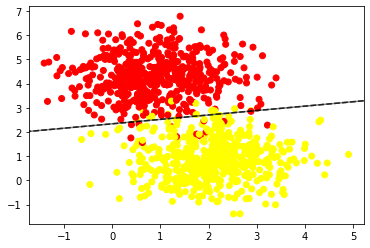

In [7]:
from logging import WARN
def plotsv(model):
  
  #if ax is None:
  ax=plt.gca()
  xlim=ax.get_xlim()
  ylim=ax.get_ylim()
  
  x=np.linspace(xlim[0],xlim[1],30)
  y=np.linspace(ylim[0],ylim[1],30)
  
  X, y= np.meshgrid(y,x)
  
  xy=np.vstack([X.ravel(),y.ravel()]).T
  
  P=model.decision_function(xy).reshape(X.shape)

  ax.contour(X,y, P, colors='k',levels=[-1,0,1],alpha=0.5,linestyles=['--','-','--'])
  
  #if plot_support:
  ax.scatter(model.support_vectors_[:,0],
               model.support_vectors_[:,1],
               s=300, linewidth=1, facecolors='none')
  ax.set_xlim(xlim)
  ax.set_ylim(ylim)
plt.scatter(W[:,0],W[:,1],c=Z,cmap='autumn')
plotsv(model)
model.support_vectors_

[[  1.]
 [  2.]
 [  3.]
 [  4.]
 [  5.]
 [  6.]
 [  7.]
 [  8.]
 [  9.]
 [ 10.]
 [ 11.]
 [ 12.]
 [ 13.]
 [ 14.]
 [ 15.]
 [ 16.]
 [ 17.]
 [ 18.]
 [ 19.]
 [ 20.]
 [ 21.]
 [ 22.]
 [ 23.]
 [ 24.]
 [ 25.]
 [ 26.]
 [ 27.]
 [ 28.]
 [ 29.]
 [ 30.]
 [ 31.]
 [ 32.]
 [ 33.]
 [ 34.]
 [ 35.]
 [ 36.]
 [ 37.]
 [ 38.]
 [ 39.]
 [ 40.]
 [ 41.]
 [ 42.]
 [ 43.]
 [ 44.]
 [ 45.]
 [ 46.]
 [ 47.]
 [ 48.]
 [ 49.]
 [ 50.]
 [ 51.]
 [ 52.]
 [ 53.]
 [ 54.]
 [ 55.]
 [ 56.]
 [ 57.]
 [ 58.]
 [ 59.]
 [ 60.]
 [ 61.]
 [ 62.]
 [ 63.]
 [ 64.]
 [ 65.]
 [ 66.]
 [ 67.]
 [ 68.]
 [ 69.]
 [ 70.]
 [ 71.]
 [ 72.]
 [ 73.]
 [ 74.]
 [ 75.]
 [ 76.]
 [ 77.]
 [ 78.]
 [ 79.]
 [ 80.]
 [ 81.]
 [ 82.]
 [ 83.]
 [ 84.]
 [ 85.]
 [ 86.]
 [ 87.]
 [ 88.]
 [ 89.]
 [ 90.]
 [ 91.]
 [ 92.]
 [ 93.]
 [ 94.]
 [ 95.]
 [ 96.]
 [ 97.]
 [ 98.]
 [ 99.]
 [100.]
 [101.]
 [102.]
 [103.]
 [104.]
 [105.]
 [106.]
 [107.]
 [108.]
 [109.]
 [110.]
 [111.]
 [112.]
 [113.]
 [114.]
 [115.]
 [116.]
 [117.]
 [118.]
 [119.]
 [120.]
 [121.]
 [122.]
 [123.]
 [124.]
 [125.]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


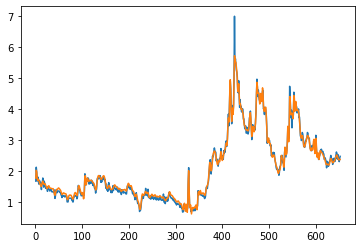

In [8]:
  from sklearn.svm import SVR
  from sklearn.preprocessing import MinMaxScaler
  sc=MinMaxScaler()
  news=np.reshape(news,(len(news),1))
  dateti=np.reshape(dateti,(len(dateti),1))
  trainy=news[0:400]
  trainx=dateti[0:400]
  testy=news[400:len(news)]
  testx=dateti[400:len(news)]

  print(dateti)
  svr=SVR(kernel='rbf',C=1e3,gamma=0.1)
  svr.fit(dateti,news)
  results=svr.predict(dateti)
  plt.plot(dateti,news)
  plt.plot(dateti,results)